## Name : Aditya Yadav
## Gmail: Yaditya191@gmail.com

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("Sales Analyst Intern Test (6).xlsx")

In [4]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Day,Test Count - Month 1,Test Count - Month 2,Test Count - Month 3,NaN,NaN,NaN,NaN
1,1,265,365,438,NaN,NaN,NaN,NaN
2,2,455,325,361,NaN,NaN,NaN,NaN
3,3,357,405,345,NaN,NaN,NaN,NaN
4,4,533,506,310,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  22 non-null     object 
 1   Unnamed: 1  21 non-null     object 
 2   Unnamed: 2  21 non-null     object 
 3   Unnamed: 3  21 non-null     object 
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
dtypes: float64(4), object(4)
memory usage: 1.7+ KB


In [6]:
df.shape

(25, 8)

In [7]:
df.nunique()

Unnamed: 0    22
Unnamed: 1    20
Unnamed: 2    20
Unnamed: 3    21
Unnamed: 4     0
Unnamed: 5     0
Unnamed: 6     0
Unnamed: 7     0
dtype: int64

In [8]:
print(f"Missing values in each variable: \n{df.isnull().sum()}")

Missing values in each variable: 
Unnamed: 0     3
Unnamed: 1     4
Unnamed: 2     4
Unnamed: 3     4
Unnamed: 4    25
Unnamed: 5    25
Unnamed: 6    25
Unnamed: 7    25
dtype: int64


### Cleaning Data

As in given the data column (Unnamed: 4, Unnamed: 5, Unnamed: 6, Unnamed: 7) contain null value hence we are droping these column.. We cannot find any insight from these column

In [9]:
df.drop(['Unnamed: 4', 'Unnamed: 5','Unnamed: 6','Unnamed: 7'], axis=1, inplace = True)

In [10]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Day,Test Count - Month 1,Test Count - Month 2,Test Count - Month 3
1,1,265,365,438
2,2,455,325,361
3,3,357,405,345
4,4,533,506,310


Fortunately, there is no missing data. We can also check if there are duplicated rows.

In [11]:
print(f"Duplicated rows: {df.duplicated().sum()}")

Duplicated rows: 2


In [12]:
df.drop_duplicates(inplace = True)

In [13]:
print(f"Duplicated rows: {df.duplicated().sum()}")

Duplicated rows: 0


In [14]:
df.head(24)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Day,Test Count - Month 1,Test Count - Month 2,Test Count - Month 3
1,1,265,365,438
2,2,455,325,361
3,3,357,405,345
4,4,533,506,310
5,5,235,604,287
6,6,356,463,466
7,7,402,346,343
8,8,405,263,331
9,9,356,463,447


In [15]:
df.rename(columns={'Unnamed: 0':'number_of_days','Unnamed: 1':'Test Count - Month 1','Unnamed: 2':'Test Count - Month 2','Unnamed: 3':'Test Count - Month 3'},inplace=True)

Deleting the row  indexed: 0,21,22 as it seems to be error values

In [16]:
df = df.drop([df.index[0], df.index[21], df.index[22]])

Finally, we check how each variable is presented in the DataFrame. 

In [17]:
print(f"Variable:     Type: \n{df.dtypes}") 

Variable:     Type: 
number_of_days          object
Test Count - Month 1    object
Test Count - Month 2    object
Test Count - Month 3    object
dtype: object


In [18]:
df.head(24)

,number_of_days,Test Count - Month 1,Test Count - Month 2,Test Count - Month 3
1,1,265,365,438
2,2,455,325,361
3,3,357,405,345
4,4,533,506,310
5,5,235,604,287
6,6,356,463,466
7,7,402,346,343
8,8,405,263,331
9,9,356,463,447
10,10,264,245,448


### Data Visualization

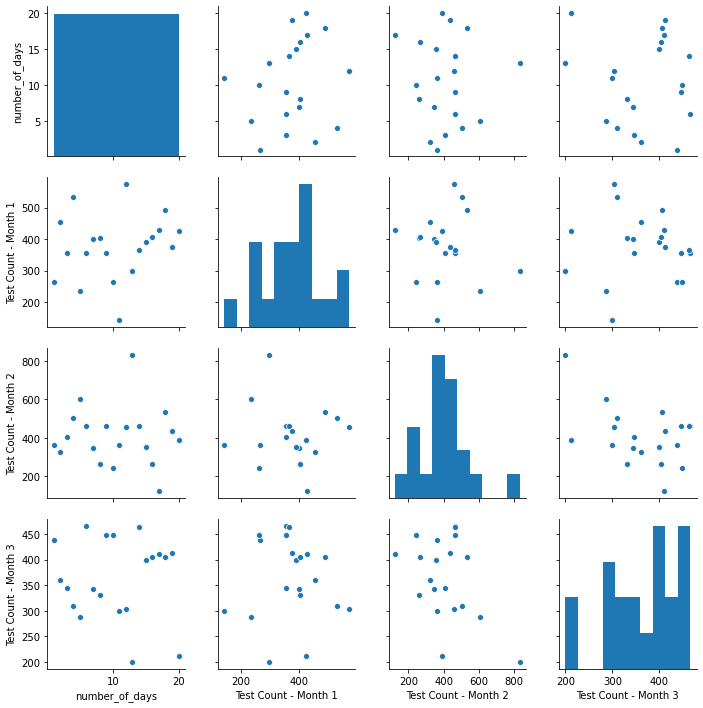

In [19]:
sns.pairplot(df)

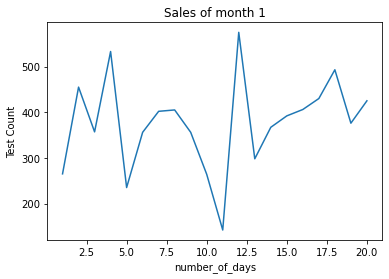

In [20]:
df['Test Count - Month 1'].plot()
plt.style.use('grayscale')
plt.title("Sales of month 1")
plt.xlabel("number_of_days")
plt.ylabel("Test Count")
plt.show()

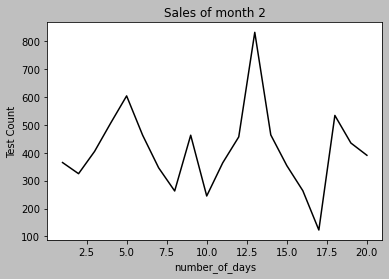

In [21]:
df['Test Count - Month 2'].plot()
plt.style.use('grayscale')
plt.title("Sales of month 2")
plt.xlabel("number_of_days")
plt.ylabel("Test Count")
plt.show()

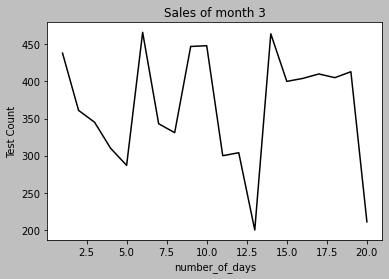

In [22]:
df['Test Count - Month 3'].plot()
plt.style.use('grayscale')
plt.title("Sales of month 3")
plt.xlabel("number_of_days")
plt.ylabel("Test Count")
plt.show()

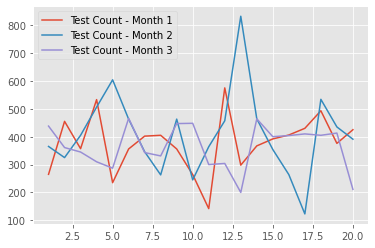

In [30]:
df['Test Count - Month 1'].plot()
df['Test Count - Month 2'].plot()
df['Test Count - Month 3'].plot()
plt.style.use('ggplot')
plt.legend()


From the above insight we can say that month 2 has highest number of count similarly in the end of month 3 test count is decreasing 

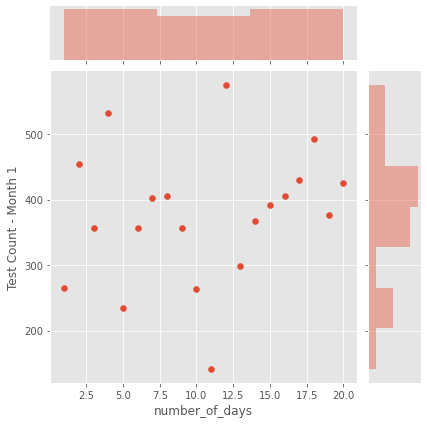

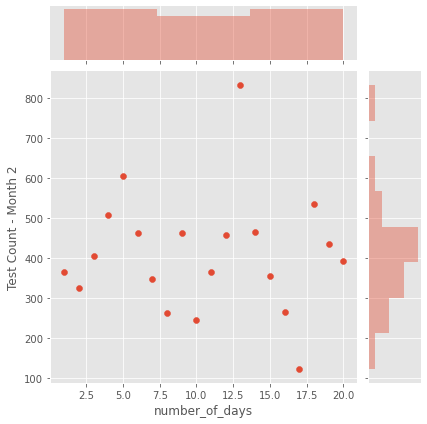

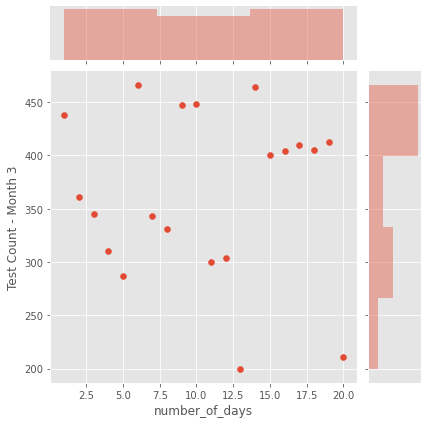

In [24]:
sns.jointplot(x='number_of_days',y='Test Count - Month 1',data=df,kind='scatter')
sns.jointplot(x='number_of_days',y='Test Count - Month 2',data=df,kind='scatter')
sns.jointplot(x='number_of_days',y='Test Count - Month 3',data=df,kind='scatter')

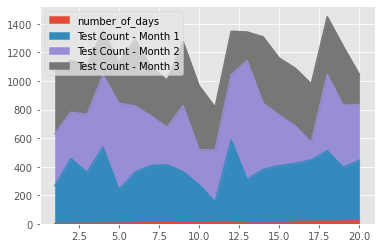

In [29]:
df.plot.area()
plt.style.use('ggplot')
plt.legend(loc=2)